Proiect AI - Detecția disfuncției temporo-mandibulare

1) Definirea problemei

Cerinta: Detecția disfuncției temporo-mandibulare: detectarea discului temporo-mandibular, si dacă acesta este deplasat anterior, lateral sau medial.

Input:  Radiografii ale articulației temporo-mandibulare (ATM).

Output: Detectarea disfuncției temporo-mandibulare (DTM) și localizarea discului temporo-mandibular (DTM) în raport cu articulația.

Tipul de ML/AI: Problema se încadrează în domeniul detecției de anomalii în imagini și poate implica atât clasificare cât și segmentare.

1. Detectarea prezenței disfuncțiilor temporomandibulare (DTM): Aceasta poate fi o problemă de clasificare binară, unde algoritmul trebuie să determine dacă o anumită radiografie a articulației temporomandibulare (ATM) prezintă sau nu o disfuncție. Alternativ, poate fi o problemă de clasificare multi-clasă, unde există mai multe tipuri de DTM și algoritmul trebuie să le distingă între ele.

2. Localizarea discului temporomandibular (DTM): Acesta este un caz de segmentare semantică, unde algoritmul trebuie să identifice și să delimiteze contururile discului temporomandibular în imaginea radiografică. Alternativ, poate fi o problemă de regresie, unde algoritmul trebuie să prezică coordonatele spațiale ale discului sau să determine poziția sa relativă (anterior, lateral sau medial) în raport cu articulația.


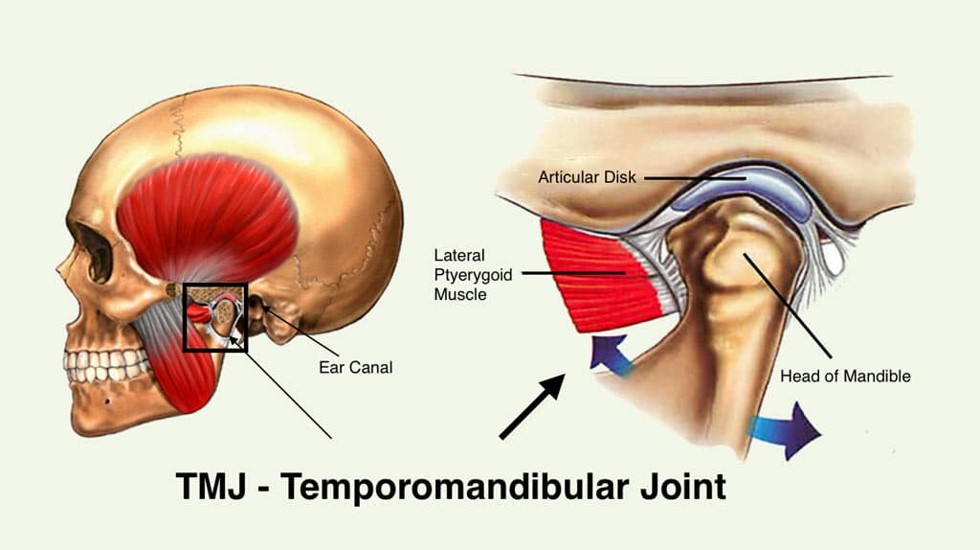

In [2]:
from IPython.display import Image

Image(filename='Imagine1.jpg') 


2. Analiza datelor


a) Data Cleaning:
În cadrul acestui proces, se va efectua o serie de acțiuni pentru a asigura calitatea și integritatea datelor din setul de date de radiografii ale articulației temporomandibulare (ATM):

Tratarea datelor lipsă: Se vor identifica și vor fi gestionate eventualele date lipsă din setul de date. Acest lucru poate implica completarea sau eliminarea acestor date în funcție de proporția lor și de importanța lor pentru analiză.

Eliminarea outlier-ilor: Se vor identifica și vor fi gestionate outlier-ii din setul de date, care pot fi rezultatul erorilor de măsurare sau a artefactelor din imaginile radiografice. Acești outlier-i pot afecta negativ performanța modelului.

Standardizarea datelor: Dacă dimensiunile sau scalele imaginilor radiografice sunt variabile, este recomandabil să se efectueze o standardizare pentru a asigura coerența în analiză. Acest lucru poate implica redimensionarea imaginilor sau normalizarea intensității pixelilor.

b) Statistici Descriptive:
Analiza statisticilor descriptive oferă o înțelegere mai profundă a caracteristicilor setului de date de radiografii ATM:

Tipul de date: Se va determina tipul de date al imaginilor radiografice (de exemplu, imagini), precum și tipul de date al altor caracteristici asociate cu fiecare imagine (cum ar fi dimensiunea discului temporomandibular, poziția sa etc.).

Numărul de exemple: Se va evalua numărul total de imagini disponibile în setul de date și numărul de exemple din fiecare clasă, dacă este cazul.

Dimensiuni ale setului de date: Se vor analiza dimensiunile imaginilor radiografice, inclusiv rezoluția și formatul acestora, precum și dimensiunile discului temporomandibular, dacă sunt disponibile.

c) Analiza de Corelație:
Analiza corelației între diferitele caracteristici extrase din imagini și prezența sau absența disfuncțiilor temporomandibulare poate oferi informații valoroase despre factorii relevanți pentru detectarea DTM:

Corelație între inputuri și outputuri: Se va investiga corelația între caracteristicile extrase din imaginile radiografice și prezența DTM, pentru a identifica caracteristicile semnificative pentru detectarea acesteia.

Corelație între diferitele caracteristici: Se va analiza corelația între diferitele caracteristici extrase din setul de date, cum ar fi dimensiunea discului temporomandibular și poziția sa, pentru a înțelege mai bine relațiile dintre acestea.

In [2]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('p11-20.csv', names=['Image', 'Label'])

# Display the first few rows of the dataframe
print(df.head())

# Display the distribution of classes
print(df['Label'].value_counts())

print(df.info())

           Image  Label
0    P11.CL1.jpg  [LDD]
1    P11.CR1.jpg    [N]
2  P11. SCL1.jpg  [ADD]
3   P11.SCR1.jpg    [N]
4   P11.SOL1.jpg  [ADD]
Label
[N]      32
[ADD]    19
[LDD]     9
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   60 non-null     object
 1   Label   60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


LDD - Lateral disk displacement

N - Normal

ADD - Anterior disk displacement

3. Dezvoltarea unui model de Ai si evaluarea performantei


Pasul 1: Structurarea datelor 


In [3]:
import os
import pandas as pd

# Define the path to the directory containing the patient folders
data_directory = 'pacienti'

# Create an empty list to store the data
all_data = []

# Loop through each patient folder in the directory
for patient_folder in os.listdir(data_directory):
    patient_path = os.path.join(data_directory, patient_folder)
    if os.path.isdir(patient_path):
        # Search for any CSV file in the patient folder
        csv_files = [f for f in os.listdir(patient_path) if f.endswith('.csv')]
        if csv_files:
            # Assuming there is only one CSV file per patient folder
            csv_file = os.path.join(patient_path, csv_files[0])
            # Read the CSV file
            df_csv = pd.read_csv(csv_file, header=None)

            # Process each entry in the CSV file
            for index, row in df_csv.iterrows():
                image = row[0].strip()
                label = row[1].strip('[] ').strip()  # Remove the square brackets and leading space
                all_data.append({
                    'Patient_ID': patient_folder,
                    'Image': image,
                    'Label': label
                })

# Create a DataFrame from the list
df_all_data = pd.DataFrame(all_data)

# Save the DataFrame to a single CSV file
df_all_data.to_csv('all_patients_radiography_data.csv', index=False)

print("Data combined successfully into 'all_patients_radiography_data.csv'")
print(df_all_data.head())

Data combined successfully into 'all_patients_radiography_data.csv'
       Patient_ID          Image Label
0  p11-20-coronal    P11.CL1.jpg   LDD
1  p11-20-coronal    P11.CR1.jpg     N
2  p11-20-coronal  P11. SCL1.jpg   ADD
3  p11-20-coronal   P11.SCR1.jpg     N
4  p11-20-coronal   P11.SOL1.jpg   ADD


Pasul 2: Pregatirea datelor pentru antrenare

In [ ]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

print(tf.__version__)

# Load the dataframe
df = pd.read_csv('all_patients_radiography_data.csv')

# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

# Define the directory where the images are located
base_directory = 'pacienti'

# Helper function to find the full path of each image
def find_full_path(image_name, base_dir):
    for root, dirs, files in os.walk(base_dir):
        if image_name in files:
            return os.path.join(root, image_name)
    return None

# Apply the helper function to get full paths for all images
df['Full_Image_Path'] = df['Image'].apply(lambda x: find_full_path(x, base_directory))

# Check for missing files
missing_files = df[df['Full_Image_Path'].isnull()]['Image'].tolist()
print(f"Missing files: {missing_files}")

# Remove rows with missing files
df = df.dropna(subset=['Full_Image_Path'])

# Split the dataframe into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Label'])

# Create the training and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,  # Setting directory to None because full paths are provided
    x_col='Full_Image_Path',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,  # Setting directory to None because full paths are provided
    x_col='Full_Image_Path',
    y_col='Label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Verifica numarul de clase
num_classes = len(train_generator.class_indices)
print("Numarul de clase:", num_classes)

# Afiseaza cateva exemple din generatorul de antrenare
for images, labels in train_generator:
    print("Forma lotului de imagini:", images.shape)
    print("Forma lotului de etichete:", labels.shape)
    break


Pas 3: Model CNN pentru clasificare

In [10]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def create_classification_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

classification_model = create_classification_model(input_shape, num_classes)
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classification_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

4. Model U-Net pentru segmentare

In [15]:
from keras import Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate

def create_unet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Expansive Path
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    up6 = concatenate([up6, drop4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(num_classes, 1, activation='softmax')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 4

# Create U-Net model
unet_model = create_unet(input_shape, num_classes)

# Compile model
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
unet_model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 224, 224,  │      1,792 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 224, 224,  │     36,928 │ conv2d_25[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 112, 112,  │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 112, 112,  │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 112, 112,  │    147,584 │ conv2d_27[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 56, 56,    │          0 │ conv2d_28[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 56, 56,    │    295,168 │ max_pooling2d_11… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 56, 56,    │    590,080 │ conv2d_29[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 28, 28,    │          0 │ conv2d_30[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 28, 28,    │  1,180,160 │ max_pooling2d_12… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 28, 28,    │  2,359,808 │ conv2d_31[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 28, 28,    │          0 │ conv2d_32[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 14, 14,    │          0 │ dropout_2[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 14, 14,    │  4,719,616 │ max_pooling2d_13… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 14, 14,    │  9,438,208 │ conv2d_33[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 14, 14,    │          0 │ conv2d_34[0][0] 

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Pas 5: Antrenarea modelului

classification_model.fit(train_generator, validation_data=val_generator, epochs=10)


Pas 6: Evaluarea modelului

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


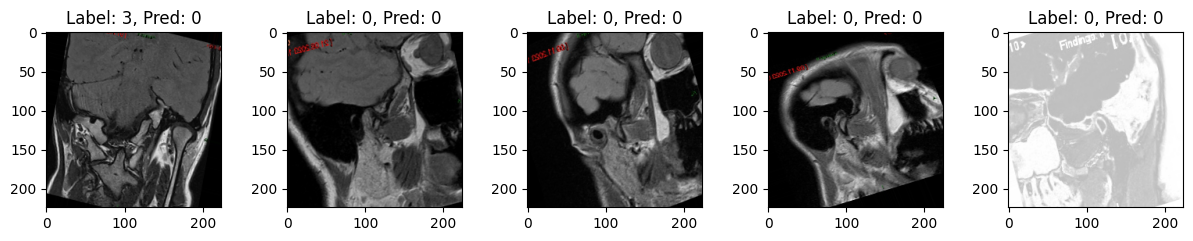

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


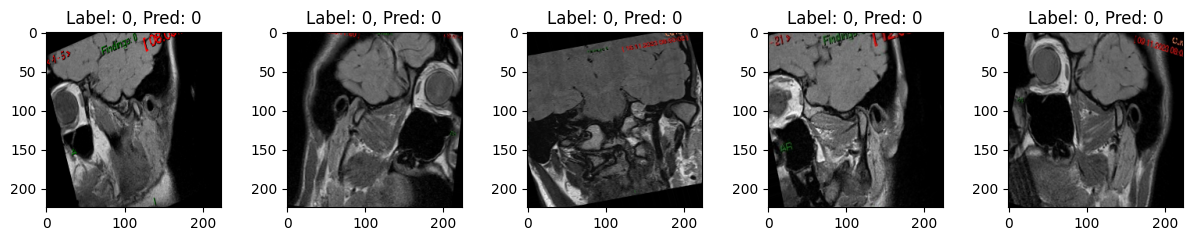

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


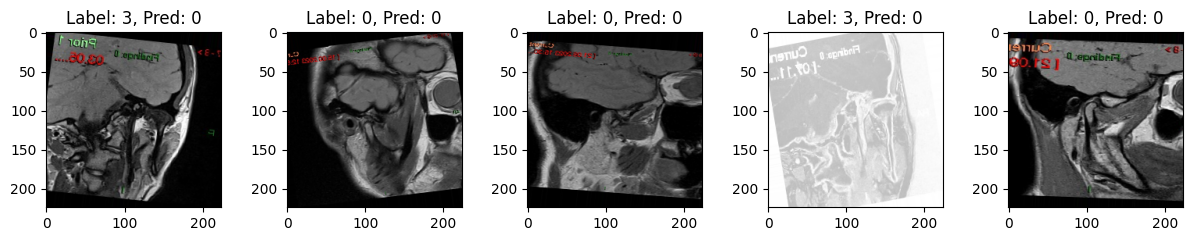

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


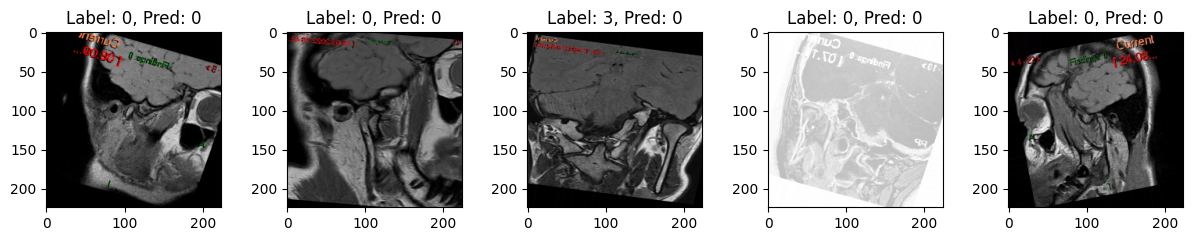

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


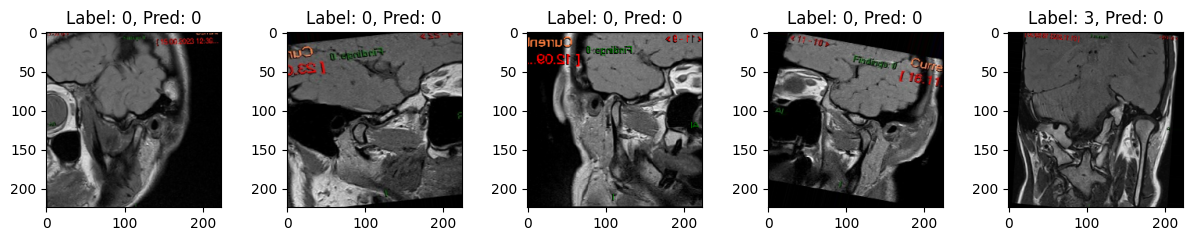

In [19]:
from matplotlib import pyplot as plt
import numpy as np

def plot_sample_predictions(generator, model, num_samples=5):
    for i, (images, labels) in enumerate(generator):
        if i == num_samples:
            break
        preds = model.predict(images)
        preds_classes = np.argmax(preds, axis=1)  # Obține clasa prezisa pentru fiecare imagine
        plt.figure(figsize=(15, 5))
        for j in range(min(num_samples, images.shape[0])):
            plt.subplot(2, num_samples, j+1)
            plt.imshow(images[j])
            plt.title(f"Label: {generator.classes[np.argmax(labels[j])]}, Pred: {generator.classes[preds_classes[j]]}")
        plt.show()

plot_sample_predictions(val_generator, classification_model)

